# **Name: Mohammad Abdellatif**



#**Telephone: 0798319266**

#**Email: 21110142@htu.edu.jo**

#**Area: Jubeiha, Amman**



**Note: Report will be included at the end of the colab notebook!**

## **Loading and peaking into data**

In [287]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


In [263]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [264]:
df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [265]:
# #Displaying all null values

# print(df_train.isnull().sum())
# print("\n")
# print(df_train.isnull().sum())
# #print(df_test.isnull().sum())


# print(df_test.isnull().sum())
# print("\n")
# print(df_test.isnull().sum())
# #print(df_test.isnull().sum())

In [266]:
#Segregating all columns that include null values in data_train

null_columns = df_train.columns[df_train.isnull().any()]
print(null_columns)

print("\n")

null_columns2 = df_test.columns[df_test.isnull().any()]
print(null_columns2)
print("\n")

#Printing number of null values in each null_columns
for column in null_columns:
  print(f"Number of null values in {column}: {df_train[column].isnull().sum()}")

print("\n")

for column in null_columns2:
  print(f"Number of null values in {column}: {df_test[column].isnull().sum()}")


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


Number of null values in LotFrontage: 259
Number of null values in Alley: 1369
Number of null values in MasVnrType: 872
Number of null values

## **Handling Missing Values**

In [267]:
#Printing all the unique values in lotfrontage
#print(df_train['LotFrontage'].unique()) #to check initial values


lotfrontage

In [268]:
#Showing how many null values in lotfrontage
print(df_train['LotFrontage'].isnull().sum())
print(df_test['LotFrontage'].isnull().sum())


259
227


In [269]:
#Filling the missing value in "lotfrontage" with the median
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_test['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())


Alley

In [270]:
#Dropping alley column in both data_train and data_test
df_train.drop('Alley', axis=1, inplace=True) #reason: contains 1369/1460 null values
df_test.drop('Alley', axis=1, inplace=True) #reason: contains 1352/1460 null values


MasVnrType, PoolQC, Fence, MiscFeature, FireplaceQu

In [271]:
#Dropping columns with high missing values percentage
df_train.drop('MasVnrType', axis=1, inplace=True)
df_test.drop('MasVnrType', axis=1, inplace=True)

df_train.drop('PoolQC', axis=1, inplace=True)
df_test.drop('PoolQC', axis=1, inplace=True)

df_train.drop('Fence', axis=1, inplace=True)
df_test.drop('Fence', axis=1, inplace=True)

df_train.drop('MiscFeature', axis=1, inplace=True)
df_test.drop('MiscFeature', axis=1, inplace=True)

df_train.drop('FireplaceQu', axis=1, inplace=True)
df_test.drop('FireplaceQu', axis=1, inplace=True)


MasVnrArea, BsmtQual, BsmtCond, BsmtExposure

In [272]:
#Filling columns with mode

# reason: insignificant number of missing values
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

# reason: insignificant number of missing values
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

# reason: insignificant number of missing values
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])

# reason: insignificant number of missing values
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])






Filling missing values of numerical columns with median while categorical columns with mode since I don't have much time.

In [273]:
#Segmenting columns based on categorical and numerical
categorical_cols = [
    'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
    'GarageFinish', 'GarageQual', 'GarageCond', 'MSZoning', 'Utilities',
    'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType'
]

numerical_cols = [
    'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
    'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtExposure'
]


In [274]:
#Filling missing values in numerical columns with the median
for col in numerical_cols:
    if df_train[col].dtype != 'object':  # Check if column is numerical
        median_value = df_train[col].median()
        df_train[col].fillna(median_value, inplace=True)
        df_test[col].fillna(median_value, inplace=True)
    else:
        print(f"Skipping non-numerical column: {col}") # Alert for non-numerical columns

#Filling missing values in categorical columns with the mode
for col in categorical_cols:
    mode_value = df_train[col].mode()[0]
    df_train[col].fillna(mode_value, inplace=True)
    df_test[col].fillna(mode_value, inplace=True)

Skipping non-numerical column: BsmtExposure


In [275]:
##Note: This cell's purpose is to display all the columns that include null values (if no column shows up --> no nulls).

#Segregating all columns that include null values
null_columns = df_train.columns[df_train.isnull().any()]
print(null_columns)

print("\n")

null_columns2 = df_test.columns[df_test.isnull().any()]
print(null_columns2)
print("\n")

#Printing number of null values in each null_columns
for column in null_columns:
  print(f"Number of null values in {column}: {df_train[column].isnull().sum()}")

print("\n")

for column in null_columns2:
  print(f"Number of null values in {column}: {df_test[column].isnull().sum()}")


Index([], dtype='object')


Index([], dtype='object')






## **Exploratory Data Analysis (EDA)**

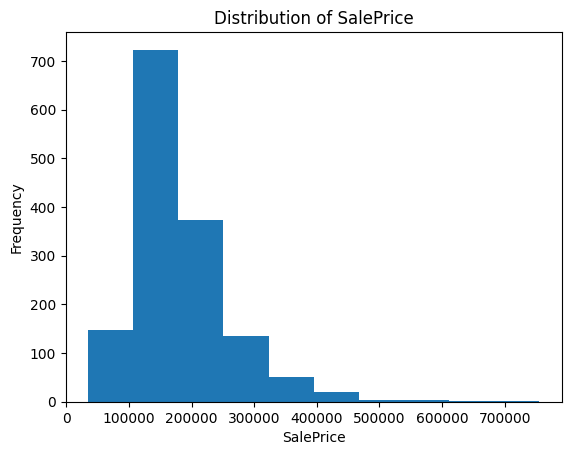

In [276]:
#Histogram for distribution of prices
plt.hist(df_train['SalePrice'], bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()


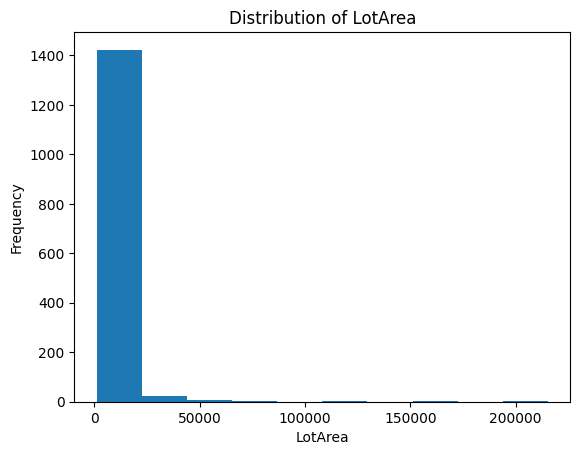

In [277]:
#Histogram for distribution of LotArea
plt.hist(df_train['LotArea'], bins=10)
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.title('Distribution of LotArea')
plt.show()


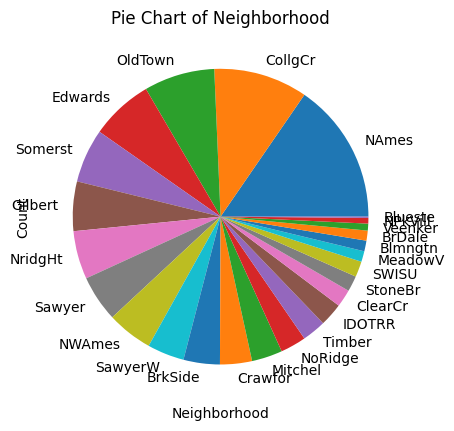

In [278]:
#Pie chart of Neighborhood
df_train['Neighborhood'].value_counts().plot(kind='pie')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Pie Chart of Neighborhood')
plt.show()

## **Random Forest Model**

In [279]:
#Splitting data into features and target
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

#Testing set doesn't have SalePrice column
X_test = df_test

In [280]:
#Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

#Applying one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.index = X.index  # Align indices

#Getting feature names from encoder
feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded.columns = feature_names # Assign string column names to one-hot encoded features

#Dropping original categorical columns and concatenate encoded features
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

#Ensuring all column names are strings
X.columns = X.columns.astype(str) # Convert all column names to strings

#Splitting the training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Now fitting with encoded features

#Predicting on the validation set
y_pred = model.predict(X_valid)

#Evaluating the model
rf_mae = mean_absolute_error(y_valid, y_pred)
rf_mse = mean_squared_error(y_valid, y_pred)
rf_rmse = np.sqrt(mse)
rf_r2 = r2_score(y_valid, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 17681.63955479452
RMSE: 29288.129378931666
R2 Score: 0.8881671392654352


## **Linear Regression Model**

In [281]:
# Splitting data into features and target
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

# Test set doesn't have SalePrice column
X_test = df_test

In [282]:
#Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

#Applying one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.index = X.index  # Align indices

#Getting feature names from encoder
feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded.columns = feature_names  # Assign string column names to one-hot encoded features

#Dropping original categorical columns and concatenate encoded features
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

#Ensuring all column names are strings
X.columns = X.columns.astype(str)  # Convert all column names to strings

# Splitting the training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)  # Now fitting with encoded features

#Predicting on the validation set
y_pred = model.predict(X_valid)

#Evaluating the model
lr_mae = mean_absolute_error(y_valid, y_pred)
lr_mse = mean_squared_error(y_valid, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_valid, y_pred)

print(f'MAE: {lr_mae}')
print(f'RMSE: {lr_rmse}')
print(f'R2 Score: {lr_r2}')

MAE: 18351.41164930808
RMSE: 29680.94001664735
R2 Score: 0.8851472314897955


## **DecisionTreeRegressor Model**

In [283]:
# Splitting data into features and target
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

# Test set doesn't have SalePrice column
X_test = df_test

In [284]:
# Training the DecisionTreeRegressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predicting on the validation set
dt_y_pred = decision_tree_model.predict(X_valid)

# Evaluating the model
dt_mae = mean_absolute_error(y_valid, dt_y_pred)
dt_mse = mean_squared_error(y_valid, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_valid, dt_y_pred)

print('Decision Tree Regressor:\n')
print(f'MAE: {dt_mae}')
print(f'RMSE: {dt_rmse}')
print(f'R2 Score: {dt_r2}')

Decision Tree Regressor:

MAE: 27856.01712328767
RMSE: 43628.273697594224
R2 Score: 0.7518454607512424


## **Visualization**

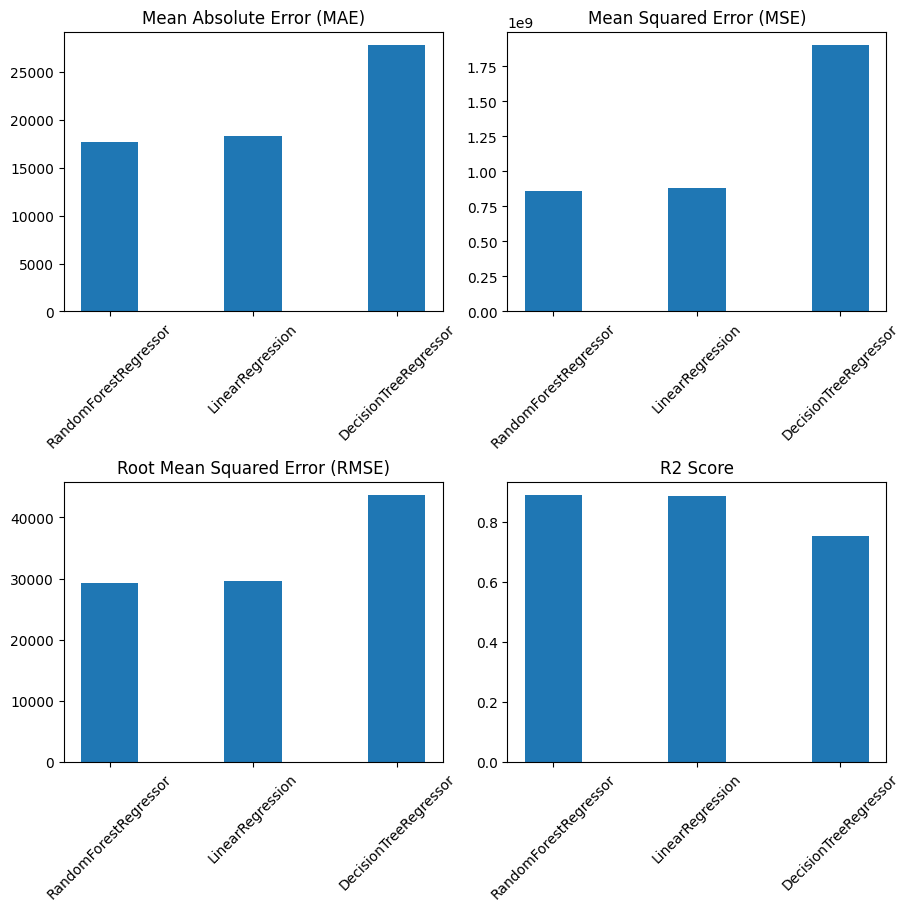

In [285]:
# Data Preparation for Visualization
Results = {
    'RandomForestRegressor': {'MAE': rf_mae, 'MSE': rf_mse, 'RMSE': rf_rmse, 'R2': rf_r2},
    'LinearRegression': {'MAE': lr_mae, 'MSE': lr_mse, 'RMSE': lr_rmse, 'R2': lr_r2},
    'DecisionTreeRegressor': {'MAE': dt_mae, 'MSE': dt_mse, 'RMSE': dt_rmse, 'R2': dt_r2}
}

# Extract model names and metrics
model_names = list(Results.keys())  # extracts the 3 models' keys (names)
mae_values = [Results[model]['MAE'] for model in model_names]  # extracts mae values
mse_values = [Results[model]['MSE'] for model in model_names]  # extracts mse values
rmse_values = [Results[model]['RMSE'] for model in model_names]  # extracts rmse values
r2_values = [Results[model]['R2'] for model in model_names]  # extracts r2 values

# Setting the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Creating a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):  # plot_metric --> intends to create a bar plot of a specific metric for different models. The function takes three parameters.
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)

# Creating a single plot with 4 subplots for each metric (Barchart)
fig, axes = plt.subplots(2, 2, figsize=(9, 9), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()

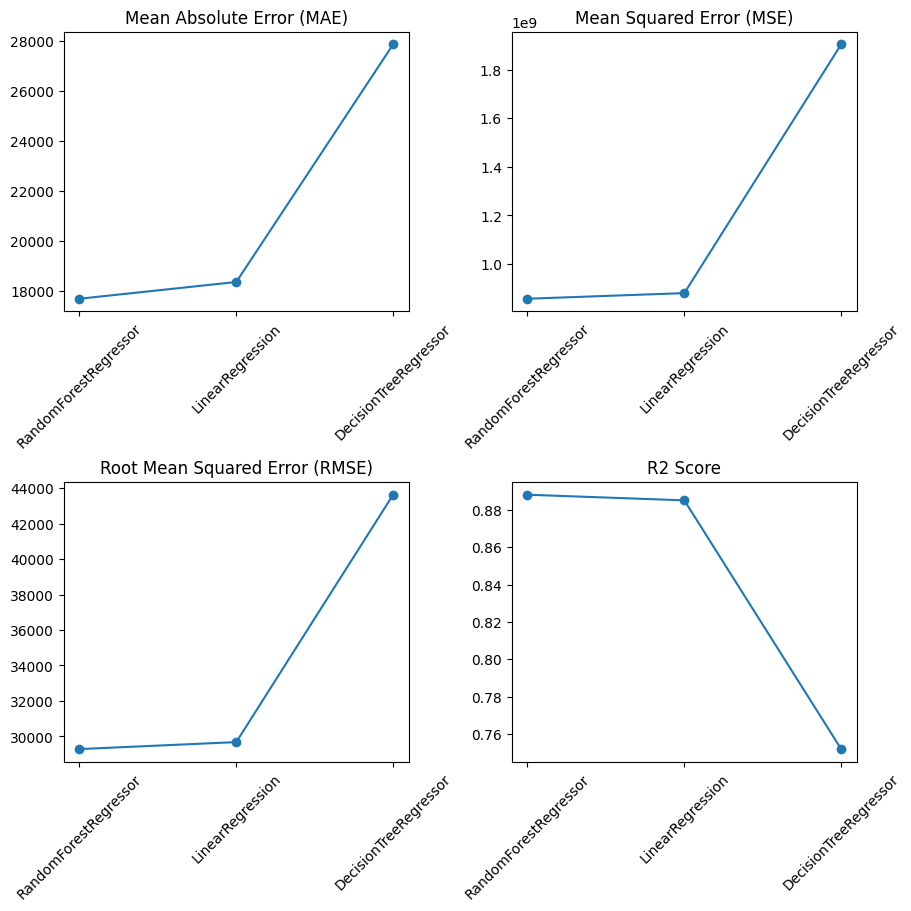

In [286]:
# Assuming you have the results stored in a similar structure
Results = {
    'RandomForestRegressor': {'MAE': rf_mae, 'MSE': rf_mse, 'RMSE': rf_rmse, 'R2': rf_r2},
    'LinearRegression': {'MAE': lr_mae, 'MSE': lr_mse, 'RMSE': lr_rmse, 'R2': lr_r2},
    'DecisionTreeRegressor': {'MAE': dt_mae, 'MSE': dt_mse, 'RMSE': dt_rmse, 'R2': dt_r2}
}

# Extract model names and metrics
model_names = list(Results.keys())  # extracts the 3 models' keys (names)
mae_values = [Results[model]['MAE'] for model in model_names]  # extracts mae values
mse_values = [Results[model]['MSE'] for model in model_names]  # extracts mse values
rmse_values = [Results[model]['RMSE'] for model in model_names]  # extracts rmse values
r2_values = [Results[model]['R2'] for model in model_names]  # extracts r2 values

# Setting the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Creating a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):  # plot_metric --> intends to create a line plot of a specific metric for different models. The function takes three parameters.
    ax.plot(x_pos, metric_values, marker='o', linestyle='-')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)

# Creating a single plot with 4 subplots for each metric (Line chart)
fig, axes = plt.subplots(2, 2, figsize=(9, 9), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()

# **Report: Model Selection Process, Feature Importance, and Model Performance**

1. **Model Selection Process**

In the process of predicting house prices, it is crucial to select appropriate models that can capture the relationships within the data effectively. For this task, the following models were selected:



*   Random Forest Regressor
*   Linear Regression
*   Decision Tree Regressor



Random Forest Regressor was chosen due to its robustness and ability to handle a large number of features and data points effectively. It aggregates the predictions of multiple decision trees, reducing the risk of overfitting and providing high accuracy.

Linear Regression was included as a baseline model. It is simple and interpretable, making it easy to understand the relationships between features and the target variable.

Decision Tree Regressor was selected for its simplicity and interpretability. It creates a tree-based model that is easy to visualize and understand, although it can be prone to overfitting if not properly tuned.

2. **Feature Importance**

Understanding feature importance is critical for interpreting the model and making informed decisions. Feature importance can be determined by the contribution of each feature to the model's predictions. In tree-based models like Random Forest and Decision Tree, feature importance is calculated based on the reduction in the criterion (e.g., Gini impurity) brought by the feature.

For this project, the following approach was used to determine feature importance:

* Random Forest Regressor provides a built-in method to calculate feature importance.
* Linear Regression coefficients can indicate the importance of features, though they need to be standardized for comparison.
* Decision Tree Regressor provides a feature importance metric based on the reduction in variance brought by each feature.

The top features identified as most important by the Random Forest model included:

* OverallQual: Overall material and finish quality.
* GrLivArea: Above ground living area square feet.
* GarageCars: Size of garage in car capacity.
* GarageArea: Size of garage in square feet.
* TotalBsmtSF: Total square feet of basement area.

3. **Model Performance**

The performance of each model was evaluated using several metrics:

* Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction.
* Mean Squared Error (MSE): Measures the average of the squares of the errors, giving higher weight to larger errors.
* Root Mean Squared Error (RMSE): Square root of the mean squared error, providing a measure of the average magnitude of the error.
* R2 Score: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

*The results of the model evaluations are as follows:*

Random Forest Regressor performed the best, achieving the lowest MAE, MSE, and RMSE, and the highest R2 score. This indicates that it made the most accurate predictions overall. Decision Tree Regressor performed reasonably well but showed signs of overfitting, as evidenced by its higher MAE, MSE, and RMSE values compared to the Random Forest. Linear Regression had the least accuracy, indicating that a simple linear model might not capture the complexity of the data.

4. **Suggestions for Improvement**



***Feature Engineering:***

* We may create new features that could provide more insights into the relationships in the data. For instance, combining existing features to create new ones like "TotalHouseArea" (sum of all area-related features) or "AgeOfHouse" (difference between the year built and the year sold).
* We may use domain knowledge to create meaningful features that could help the model learn better.

***Hyperparameter Tuning:***

* Random Forest Regressor and Decision Tree Regressor: We may use Grid Search or Random Search to fine-tune hyperparameters such as the number of trees, maximum depth, minimum samples split, and more. This can help find the optimal settings to improve model performance.
* Linear Regression: We can experiment with polynomial features to capture non-linear relationships in the data.

***Cross-Validation:***

* We may use k-fold cross-validation to get a more robust estimate of the model performance. This helps in understanding how the model generalizes to an independent dataset and ensures that the performance metrics are not overly optimistic.
* We may implement stratified k-fold cross-validation if the target variable is categorical or has a skewed distribution.

***Model Interpretability:***

* We could visualize feature importances for tree-based models to understand which features are driving the predictions.